In [94]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from nltk.stem.porter import *
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np
sw = stopwords.words("english")

In [95]:
def mae(target, pred):
    return np.mean(np.abs(target-pred))

In [96]:
reviews_table = pd.DataFrame()
for f in os.listdir('./reviews/'):
    if f[0] != '.':
        table_to_add = pd.read_json('./reviews/'+f, lines = True)
        reviews_table = pd.concat([reviews_table, table_to_add])
    print(reviews_table.shape)

(531, 4)
(1152, 4)
(1505, 4)
(1783, 4)
(3445, 4)
(3841, 4)
(3995, 4)
(6401, 4)
(7162, 4)
(7362, 4)
(7581, 4)
(8184, 4)
(8295, 4)
(8429, 4)
(8779, 4)
(9085, 4)
(9525, 4)
(10138, 4)
(10455, 4)
(11659, 4)
(11771, 4)
(12014, 4)
(12444, 4)
(12915, 4)
(14474, 4)
(14601, 4)
(14805, 4)
(15004, 4)
(15632, 4)
(17852, 4)
(18029, 4)
(18310, 4)
(18569, 4)
(18943, 4)
(19251, 4)
(19361, 4)
(19493, 4)
(19665, 4)
(19928, 4)
(20229, 4)
(20415, 4)
(20955, 4)
(21198, 4)
(22386, 4)
(22854, 4)
(23576, 4)
(23865, 4)
(24807, 4)
(27176, 4)
(27305, 4)
(27663, 4)
(29830, 4)
(29956, 4)
(30342, 4)
(30479, 4)
(30815, 4)
(31370, 4)
(31618, 4)
(32157, 4)
(32324, 4)
(34393, 4)
(34496, 4)
(34621, 4)
(34863, 4)
(35716, 4)
(36396, 4)
(37304, 4)
(37861, 4)
(38643, 4)
(39075, 4)
(39215, 4)
(39351, 4)
(39680, 4)
(40238, 4)
(40769, 4)
(41066, 4)
(41226, 4)
(42112, 4)
(42371, 4)
(42729, 4)
(43023, 4)
(43470, 4)
(43672, 4)
(43951, 4)
(44371, 4)
(46172, 4)
(46622, 4)
(46912, 4)
(47065, 4)
(48057, 4)
(48170, 4)
(48322, 4)
(48964

(382531, 4)
(382712, 4)
(382835, 4)
(383072, 4)
(383261, 4)
(384551, 4)
(384899, 4)
(386836, 4)
(387055, 4)
(387173, 4)
(387579, 4)
(387801, 4)
(387926, 4)
(388064, 4)
(388325, 4)
(388537, 4)
(389559, 4)
(389922, 4)
(390115, 4)
(390524, 4)
(390638, 4)
(391446, 4)
(391880, 4)
(392055, 4)
(392159, 4)
(392434, 4)
(392668, 4)
(392874, 4)
(393120, 4)
(393633, 4)
(393868, 4)
(394063, 4)
(394167, 4)
(394526, 4)
(394681, 4)
(394983, 4)
(395102, 4)
(395263, 4)
(395692, 4)
(395870, 4)
(396238, 4)
(396375, 4)
(397049, 4)
(397393, 4)
(397633, 4)
(397745, 4)
(398145, 4)
(398918, 4)
(399650, 4)
(399782, 4)
(402093, 4)
(402645, 4)
(402810, 4)
(403392, 4)
(403497, 4)
(404458, 4)
(404648, 4)
(404757, 4)
(405889, 4)
(406799, 4)
(407129, 4)
(407259, 4)
(407813, 4)
(409416, 4)
(411963, 4)
(413009, 4)
(414396, 4)
(414701, 4)
(415242, 4)
(415577, 4)
(416043, 4)
(416158, 4)
(416971, 4)
(417087, 4)
(417447, 4)
(417639, 4)
(418075, 4)
(418764, 4)
(419311, 4)
(420080, 4)
(420596, 4)
(421303, 4)
(421490, 4)
(421

(723405, 4)
(723752, 4)
(723899, 4)
(724147, 4)
(724329, 4)
(726056, 4)
(727942, 4)
(728478, 4)
(729193, 4)
(729466, 4)
(729715, 4)
(730777, 4)
(731026, 4)
(731390, 4)
(731712, 4)
(732028, 4)
(732184, 4)
(732403, 4)
(732544, 4)
(732721, 4)
(732874, 4)
(732992, 4)
(733120, 4)
(734193, 4)
(734317, 4)
(736538, 4)
(737070, 4)
(738302, 4)
(738647, 4)
(739086, 4)
(739233, 4)
(739711, 4)
(740041, 4)
(740577, 4)
(741364, 4)
(741588, 4)
(742437, 4)
(742540, 4)
(742860, 4)
(743176, 4)
(743366, 4)
(743892, 4)
(744735, 4)
(745243, 4)
(745526, 4)
(745977, 4)
(746214, 4)
(746341, 4)
(747012, 4)
(747333, 4)
(747858, 4)
(748263, 4)
(748508, 4)
(749017, 4)
(750057, 4)
(750220, 4)
(750327, 4)
(750567, 4)
(751107, 4)
(751376, 4)
(751527, 4)
(752430, 4)
(752733, 4)
(752936, 4)
(753079, 4)
(753917, 4)
(754811, 4)
(754933, 4)
(755057, 4)
(755206, 4)
(755705, 4)
(756232, 4)
(756443, 4)
(758029, 4)
(758421, 4)
(758642, 4)
(762585, 4)
(763014, 4)
(763128, 4)
(763353, 4)
(763925, 4)
(764079, 4)
(764457, 4)
(764

(1081397, 4)
(1081503, 4)
(1081885, 4)
(1082219, 4)
(1083060, 4)
(1084249, 4)
(1084348, 4)
(1084754, 4)
(1084984, 4)
(1085101, 4)
(1085261, 4)
(1086709, 4)
(1087433, 4)
(1087648, 4)
(1087816, 4)
(1088043, 4)
(1088427, 4)
(1088618, 4)
(1088816, 4)
(1088922, 4)
(1089140, 4)
(1089915, 4)
(1090252, 4)
(1090464, 4)
(1090732, 4)
(1090845, 4)
(1092699, 4)
(1093069, 4)
(1093774, 4)
(1094391, 4)
(1094539, 4)
(1094654, 4)
(1094817, 4)
(1094934, 4)
(1096944, 4)
(1097504, 4)
(1097899, 4)
(1098176, 4)


In [97]:
# reviews_table = pd.read_json('reviews/bi-rite-creamery-san-francisco.json', lines=True)
reviews_table.reviewRating = reviews_table.reviewRating.apply(lambda d: d['ratingValue'])

In [99]:
reviews_table.reviewRating.value_counts() / len(reviews_table.index)

5    0.374535
4    0.329157
3    0.148774
2    0.077021
1    0.070513
Name: reviewRating, dtype: float64

In [100]:
# Make stratified sample
# 35% 5's, 25% 4's, 20% 3's, 10% 2's, 10% 1's
weight_5 = 0.35
weight_4 = 0.35
weight_3 = 0.15
weight_2 = 0.075
weight_1 = 0.075

num_1 = reviews_table[reviews_table.reviewRating == 1].shape[0]
num_2 = reviews_table[reviews_table.reviewRating == 2].shape[0]
num_3 = reviews_table[reviews_table.reviewRating == 3].shape[0]
num_4 = reviews_table[reviews_table.reviewRating == 4].shape[0]
num_5 = reviews_table[reviews_table.reviewRating == 5].shape[0]
sample_size = min(num_1 * 1/weight_1, num_2 * 1/weight_2, num_3 * 1/weight_3, num_4 * 1/weight_4, num_5 * 1/weight_5)


sample_1 = reviews_table[reviews_table.reviewRating == 1].sample(int(sample_size * weight_1))
sample_2 = reviews_table[reviews_table.reviewRating == 2].sample(int(sample_size * weight_2))
sample_3 = reviews_table[reviews_table.reviewRating == 3].sample(int(sample_size * weight_3))
sample_4 = reviews_table[reviews_table.reviewRating == 4].sample(int(sample_size * weight_4))
sample_5 = reviews_table[reviews_table.reviewRating == 5].sample(int(round(sample_size * weight_5)))

stratified_reviews = pd.concat([sample_1, sample_2, sample_3, sample_4, sample_5])
stratified_reviews.shape

(1032480, 4)

In [ ]:
# Stemmer for countvectorizer
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

stem_vectorizer = CountVectorizer(analyzer=stemmed_words, stop_words = sw)
X = stem_vectorizer.fit_transform(stratified_reviews.description)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, stratified_reviews.reviewRating, test_size=0.2, random_state=42)

# Linear Model

In [35]:
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [36]:
y_pred = lm.predict(X_test)
y_pred = np.round(y_pred)
mae(y_pred, y_test)

0.9852941176470589

(array([ 14.,  11.,  40.,  73., 134.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

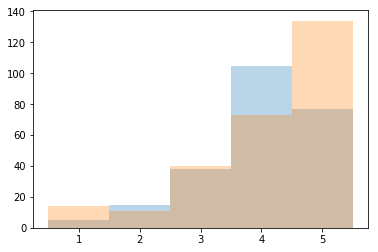

In [37]:
plt.hist(y_pred, bins = np.arange(0.5,6.5,1), alpha = 0.3)
plt.hist(y_test, bins = np.arange(0.5,6.5,1), alpha = 0.3)

# Random Forest

In [38]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
y_pred = clf.predict(X_test)
y_pred = np.round(y_pred)
mae(y_pred, y_test)

0.8897058823529411

(array([ 14.,  11.,  40.,  73., 134.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

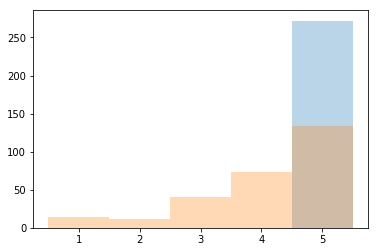

In [40]:
plt.hist(y_pred, bins = np.arange(0.5,6.5,1), alpha = 0.3)
plt.hist(y_test, bins = np.arange(0.5,6.5,1), alpha = 0.3)

# Logistic Regression

In [73]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [74]:
y_pred = clf.predict(X_test)
mae(y_pred, y_test)

0.6727941176470589

In [75]:
pd.Series(y_pred).value_counts()

5    164
4     55
3     36
2     12
1      5
dtype: int64

(array([ 14.,  11.,  40.,  73., 134.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

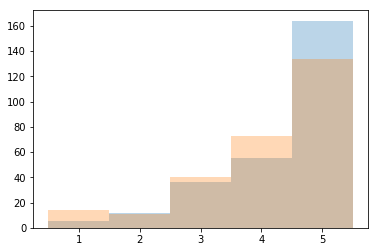

In [76]:
plt.hist(y_pred, bins = np.arange(0.5,6.5,1), alpha = 0.3)
plt.hist(y_test, bins = np.arange(0.5,6.5,1), alpha = 0.3)

## Gaussian NB

In [56]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
y_pred = clf.predict(X_test.toarray())
mae(y_pred, y_test)

1.0330882352941178

(array([ 14.,  11.,  40.,  73., 134.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

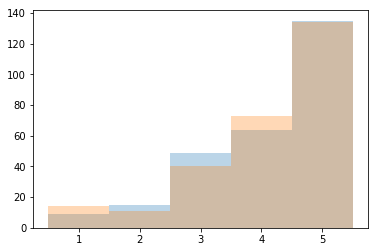

In [58]:
plt.hist(y_pred, bins = np.arange(0.5,6.5,1), alpha = 0.3)
plt.hist(y_test, bins = np.arange(0.5,6.5,1), alpha = 0.3)

## SVM

In [79]:
clf = LinearSVC(random_state=0, tol=1e-5)

In [82]:
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [83]:
y_pred = clf.predict(X_test)
mae(y_pred, y_test)

0.6580882352941176

(array([ 14.,  11.,  40.,  73., 134.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

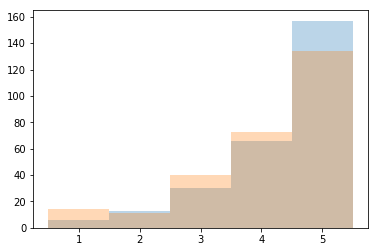

In [84]:
plt.hist(y_pred, bins = np.arange(0.5,6.5,1), alpha = 0.3)
plt.hist(y_test, bins = np.arange(0.5,6.5,1), alpha = 0.3)